# Python Assingment: Legal Prostitution and Sexual Crimes


|Name|Examnr.|
|----|-------|
|Ryan Wilson| 2019046 |
|Jonathan Thurling|2019177|

## Overview

### Research Question

***Does legalizing prostitution reduce sexual criminality?***


### Motivation 
In 2010, it was reported that one in five women will be raped in the USA during their life time [(CDC 2010)](http://www.cdc.gov/ViolencePrevention/pdf/NISVS_Report2010-a.pdf). While the rates in Europe are lower, the perverse crime of sexual assault is a plague that neither side of the Atlantic has rid itself of. Most governments around the world prohibit prostitution due to moral concerns, disease transmission and/or victimization. 

The Netherlands has a long liberal tradition of tolerance toward prostitution. There is the well-known re light district but, in addition, the Dutch government also regulates other parts of the sex industry. Prostitution has also been found to have connections to international trafficking organizations and various other forms of crime. Despite the ongoing debate about legalizing prostitution, there exists little empirical evidence about the effects of government regulation. [Bisschop et al](https://www.aeaweb.org/articles?id=10.1257/pol.20150299) analyze empirically how the presence of a tippelzone affects the total amount of various types of crime in Dutch cities. A tippelzone is a designated legal street prostitution zone where soliciting and purchasing sex is tolerated between strict opening and closing hours at night. There results show that legalizing prositution may be a solution to reducing rates of sexual crimes.


### Method (<a href='#Method'>Link</a>)

To explore the effect of the Tippelzones on sexual crimes, a difference-in-difference methdology is used. This is methodology is available because different cities used Tippelzones at different times. We can compare the sexual crime rates of cities before and after they implemented a Tippelzone to comparable cities that did not introduce a Tippelzone. Click the link for an explanation of the precise methodology

### Results (<a href='#Results'>Link</a>)

Our results are along the same lines as that of [Bisschop et al](https://www.aeaweb.org/articles?id=10.1257/pol.20150299), which show that opening a tippelzone reduces sexual abuse and rape. These results are mainly driven by a 30–40 percent reduction in the first two years after opening the tippelzone. 

There are clear effects of legalising prostitution. The differe-in-difference analyses have given us causal evidence that a world in which prosititution is legal is a safer world for women. The causal estimations are formed off reasonable assumptions and governments should look to the results of Bisschop et al as a solution to reducing sexual violence in their respective countries. 


### Assumptions (<a href='#Assumptions'>Link</a>)

We can infer that this is a causal effect through the research design. A diff-in-diff research design rests on the following assumptions:
- The Timing of the Policy is exogenous 
- There were common trends before the treatment
- There were not other policies that could bias the relationship

The salient assumption is that there was a common time tred before the implementation of the tippelzones. We can deduce that this is true through the graph of the three major cities and with evidence from [Bisschop et al](https://www.aeaweb.org/articles?id=10.1257/pol.20150299). 



## Importing Libaries and Data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as sm

#Importing the Data
Data1 = pd.read_csv('Prostitutiondata.csv')

#Counting the number of observations
print('Data1 is composed of',Data1.shape[0],'rows and',Data1.shape[1],'columns in this DataFrame')

#Printing the first 5 rows
Data1.head()

Data1 is composed of 450 rows and 65 columns in this DataFrame


,city,year,opening,closing,city1,logpopdens,openingReg,mayorCDA,mayorCU,mayorD66,...,simtheftpcN,aggtheftpcN,lnsimtheftN,lnaggtheftN,theftpcN,lntheftN,pordoffpcN,pordviolpcN,lnpordoffN,lnpordviolN
0,Amsterdam,1994,0,0,1,8.381145,0,0,0,0,...,59.2463,57.9343,8.364042,8.341649,117.1810,9.046055,7.59568,5.10982,6.309918,5.913503
1,Amsterdam,1995,0,0,1,8.378620,0,0,0,0,...,50.8148,43.8226,8.207947,8.059908,94.6374,8.829812,7.06146,4.36149,6.234411,5.752573
2,Amsterdam,1996,1,0,1,8.372861,0,0,0,0,...,42.3328,37.1108,8.019613,7.887959,79.4437,8.649098,7.51965,5.43085,6.291569,5.966147
3,Amsterdam,1997,1,0,1,8.368693,0,0,0,0,...,46.8435,32.8603,8.116715,7.762171,79.7038,8.648221,6.85173,4.19494,6.194406,5.703783
4,Amsterdam,1998,1,0,1,8.372861,0,0,0,0,...,45.2551,33.9065,8.086411,7.797702,79.1616,8.645586,6.12685,4.59513,6.086775,5.799093


## Data

The is taken from [Bisschop et al](https://www.aeaweb.org/articles?id=10.1257/pol.20150299). These authors look at how the rates of sexual crimes changed between 1994 and 2011. Over this time several Dutch cities closed and opened "tipplezones" (zones in which prostitution was legal). The data comes from [Statistics Netherlands](https://www.cbs.nl/en-gb) and criminal reports collected by the Dutch Prosecutor General (PG).

### Exploring the Data


In [3]:
#Keeping the relevant columns
rapedata = Data1[['city','city1','year','lnrapeN','opening']]

# Dropping missing values 
rapedata = rapedata.dropna()

#Counting the number of observations
print('We now have data is composed of',rapedata.shape[0],'rows and',rapedata.shape[1],'columns')


#Viewing the dataframe
rapedata.head()


We now have data is composed of 450 rows and 5 columns


,city,city1,year,lnrapeN,opening
0,Amsterdam,1,1994,4.828314,0
1,Amsterdam,1,1995,4.499810,0
2,Amsterdam,1,1996,4.442651,1
3,Amsterdam,1,1997,4.007333,1
4,Amsterdam,1,1998,4.248495,1


Now that we have a relatively clean data set. The following section will explore the presemt some visual illustrations of the data and present the summary statistics. For this section, we are specifically looking at the number of rapes that occured in the three biggest cities of The Netherlands over the years 1994 t0 2011. 

In [4]:
#Selecting the cities which want to be reported
rapedataAMS = rapedata.loc[rapedata['city']=='Amsterdam']
rapedataROT = rapedata.loc[rapedata['city']=='Rotterdam']
rapedataDHG = rapedata.loc[rapedata['city']=='Den Haag']

rapedata = pd.concat([rapedataAMS, rapedataROT, rapedataDHG], ignore_index = True)

#Setting the Index
rapedata.set_index('year', inplace = True)

#Order by year
rapedata.sort_values(['year'], inplace = True)

rapedata.head()

,city,city1,lnrapeN,opening
year,,,,
1994,Amsterdam,1,4.828314,0
1994,Rotterdam,2,4.007333,0
1994,Den Haag,3,3.806663,1
1995,Amsterdam,1,4.499810,0
1995,Rotterdam,2,4.553877,1


In [5]:
#Creating new columns to create the necessary graphs
rapedata['Amsterdam'] = rapedata.lnrapeN[0::3]
rapedata['Rotterdam'] = rapedata.lnrapeN[1::3]
rapedata['Den Haag'] = rapedata.lnrapeN[2::3]

#Creating a new dataframe (Rapedata1) with the relevant structure
rapedata1 = rapedata[['Amsterdam', 'Rotterdam', 'Den Haag']]

#dropping duplicates
rapedata1 = rapedata1.loc[::3,:]

#Checking if the data looks how we want it to look
rapedata1.head()

,Amsterdam,Rotterdam,Den Haag
year,,,
1994,4.828314,4.007333,3.806663
1995,4.499810,4.553877,3.912023
1996,4.442651,4.499810,3.912023
1997,4.007333,3.912023,3.912023
1998,4.317488,4.007333,4.248495


Here, we are specifically looking at how the number of rapes in these three cities has changed over time. In order to get create a neat graph, the cities have been programmed as columns, the indeces are now the years, and the values are logged number of rapes in that year. 

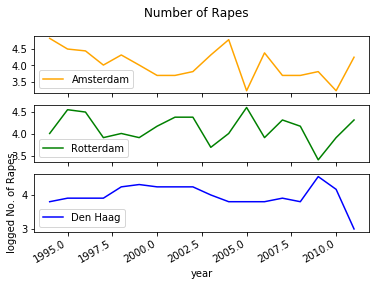

In [6]:
COLORS = ['orange','green','blue']

rapedata1.plot.line(title = 'Number of Rapes', subplots = True, color=COLORS)
plt.xlabel('year')
plt.ylabel('logged No. of Rapes')
plt.show()


In [7]:
rapedata1.describe()

,Amsterdam,Rotterdam,Den Haag
count,18.000000,18.000000,18.000000
mean,4.035835,4.120379,3.984678
std,0.474065,0.316485,0.334947
min,3.218876,3.401197,2.995732
25%,3.688879,3.912023,3.806663
50%,4.007333,4.090860,3.912023
75%,4.365892,4.365892,4.248495
max,4.828314,4.605170,4.553877


As can be seen in the figures and the summary statistics, the number of people raped in these three cities is not consistant but has varied over time. Amstersam appears to have had the highest number of rapes in a year but Rotterdam has the highest average number of rapes over the years. Den Haag has the least number of rapes. 

The variation in the numbers is interesting given that over these years 'tippelzones', or legal prostition zones were opened and closed. The next section will visually explore how the date at which a tippelzone opened affected the data in Amsterdam.

### Creating a Graph of number of Rapes in Amsterdam with Opening of Tippelzones

In [8]:
#Calling back the Dataframe that contains the variable opening 
rapedata.head()

#Selecting the Amsterdam rows
rapedata2 = rapedata[['Amsterdam', 'opening']]

#dropping duplicates
rapedata2 = rapedata2.loc[::3,:]

rapedata2.head()



,Amsterdam,opening
year,,
1994,4.828314,0
1995,4.499810,0
1996,4.442651,1
1997,4.007333,1
1998,4.317488,1


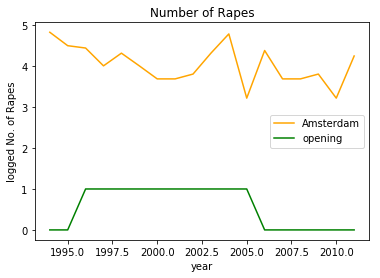

In [9]:
COLORS = ['orange','green']

rapedata2.plot.line(title = 'Number of Rapes', subplots = False, color=COLORS)
plt.xlabel('year')
plt.ylabel('logged No. of Rapes')
plt.show()

As one can see in the graph, it is not considerably clear that the opening of the tippelzone in Amsterdam reduced the number of rapes. However, this is only a visual representation and thus there may be confounding variables. In order to estimate an unbiased estimation, a difference-in-difference estimation will be used. 

## A diff-in-diff estimation of the effect of tippelzones

This section introduces the ecoometric analysis. We will run a diff-in-diff estimation to get a estimation of the effect that Tippelzones had on the numbers of sexual crimes committed in The Netherlands.

<a id='Method'><a/>

### Method 

The following is the diff-in-diff model that will be run to assess the affect of the tippelzones

$$ Y_{i,t} = \alpha + X_{1}Opening_{i,t} + X_{2}CV_{i,t} + X_{3}Year_{t} + X_{4}City_{i} + \epsilon_{i,t}$$
       

Where:
   - Opening is a dummy variable denoting where a tippelzone is open in that year
   - CV is a list of covariates 
       - Male Population
       - Population density
       - Household Income (1000 Euros)
       - Percentage of individuals with higher education
       - Percentage of Non-dutch inhabitants
       - Percentage of individuals who recieved welfare benefits
       - The mayor's political party
   - Year indicates yearly-time fixed effects
   - City represents city-level fixed effects

In [15]:
#Creating a list of convariates for the Regression

CV_it = ['logpopmale1565', 'logpopdens' , 'inkhh' , 'educhpc' , 'nondutchpc' , 'insurWWAO', 'mayorCDA' , 'mayorCU' , 'mayorD66', 'mayorVVD']

So, in order to estimate the effect of X1, we need to run an OLS fixed effect regression. The data looks as follows:

In [16]:
#An OLS fixed effects (City and time) regression, with the number of rapes (logged) as the dependent variable, opening as the treatment variable.


FE_olsRape = sm.ols(formula = 'lnrapeN ~ Data1[CV_it] + C(year) + C(city1) + opening', data= Data1).fit()

print(FE_olsRape.summary())


                            OLS Regression Results                            
Dep. Variable:                lnrapeN   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     29.36
Date:                Mon, 14 Jan 2019   Prob (F-statistic):          2.45e-106
Time:                        17:21:59   Log-Likelihood:                -249.56
No. Observations:                 450   AIC:                             605.1
Df Residuals:                     397   BIC:                             822.9
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          12.1175      7.302     

So, as we can see from the OLS regression, the tippelzones decreased the incidences of rape by approximiately 4.2%. This is the same result [Bisschop et al](https://www.aeaweb.org/articles?id=10.1257/pol.20150299) get in their estimation. We can infer that this is a causal effect through the research design.

We can also extend our analysis to the effects of tippelzones on not only rape by sexual assualt. 

### A Diff-in-diff estimating the effect of the tippelzones on sexual crimes in general

In [17]:
FE_olsAST = sm.ols(formula = 'lnsexassaultN ~ Data1[CV_it] + C(year) + C(city1) + opening', data= Data1).fit()

print(FE_olsAST.summary())

                            OLS Regression Results                            
Dep. Variable:          lnsexassaultN   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     20.38
Date:                Mon, 14 Jan 2019   Prob (F-statistic):           2.74e-83
Time:                        17:22:00   Log-Likelihood:                -284.93
No. Observations:                 450   AIC:                             675.9
Df Residuals:                     397   BIC:                             893.7
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.3912      7.899     

When we broaden the dependent variable to sexual crimes, we see that legalizing prostitution reduces sexual assaults and rapes by over 30%. This is same figure obtained by [Bisschop et al](https://www.aeaweb.org/articles?id=10.1257/pol.20150299) and is the main conclusion of their paper. 

<a id='Results'><a/>

### Results

Our results are along the same lines as that of [Bisschop et al](https://www.aeaweb.org/articles?id=10.1257/pol.20150299), which show that opening a tippelzone reduces sexual abuse and rape. These results are mainly driven by a 30–40 percent reduction in the first two years after opening the tippelzone.


These authors have shown us that a counterfactual situation in a world a where prostitution is legal can be safer for women. Legalization brings prostitution into the government’s jurisdiction. It gives the government the power to regulate and protect sellers of sex as well as buyers. Furthermore, the evidence points out that whether or not regulation materializes, mere legalization deters would be sexual aggressors from perpetrating crimes. This makes intuitive sense. By bringing prostitutes under the law, they are seen as having basic rights that are not afforded to them if their profession is deemed illegal. 

<a id='Assumptions'><a/>

### Assumptions

We can infer that this is a causal effect through the research design, a differe-in-difference analysis. A diff-in-diff research design rests on the following assumptions:

- The Timing of the Policy is exogenous 
 - We have to assume that the policy instituted was independent of trends in sexual crimes otherwise this may introduce some bias in our estimates.
- There were common trends before the treatment
 - In order to draw causal estimations, we assume that our control group is comparable to the treatment group.
- There were not other policies that could bias the relationship
 - Other policies may also introduce some bias into our estimations because some of the effect we attribute to the Tippelzone policy may in fact be attributable to the another polciy. 

The salient assumption is that there was a common time tred before the implementation of the tippelzones. We can deduce that this is true through the graph of the three major cities and with evidence from [Bisschop et al](https://www.aeaweb.org/articles?id=10.1257/pol.20150299). They are also sure to point out that thetiming of the policy was exogenous and that no other significant policies relating to sexual crimes were instituted over the treatment period. 